<h1>Laptop Price Predictor</h1>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv('laptop_data_actual.csv')
data

,Company,Inches,Cpu,Ram,Gpu,OpSys,SSD,Price
0,Lenovo,15.6,intel core i5-12450h,16gb,integrated graphics,No Os/ Linux,512gb ssd,499.00
1,Alurin,14,intel celeron n4020,8gb,integrated graphics,No Os/ Linux,256gb ssd,229.90
2,Acer,15.6,intel core i5-13420h,16gb,rtx 3050,No Os/ Linux,1tb ssd,769.00
3,HP,15.6,intel core i5-1335u,16gb,integrated graphics,No Os/ Linux,512gb ssd,599.00
4,MSI,17.3,intel core i7-13700h,16gb,rtx 4070,No Os/ Linux,1tb ssd,1399.00
...,...,...,...,...,...,...,...,...
2706,Vant,14,intel core i7-1255u,40 gb,integrated graphics,No Os/ Linux,1tb ssd,1217.00
2707,Vant,14,intel core i5-10210u,16gb,integrated graphics,No Os/ Linux,500gb ssd,994.00
2708,Vant,14,intel core i7-10510u,16gb,integrated graphics,No Os/ Linux,500gb ssd,1123.00
2709,Vant,14,intel core i7-10510u,16gb,integrated graphics,No Os/ Linux,500gb ssd,1123.00


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  2711 non-null   object 
 1   Inches   2705 non-null   object 
 2   Cpu      2707 non-null   object 
 3   Ram      2711 non-null   object 
 4   Gpu      2711 non-null   object 
 5   OpSys    2711 non-null   object 
 6   SSD      2711 non-null   object 
 7   Price    2711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 169.6+ KB


In [136]:
data = data.drop(data[data['Inches'].isnull()].index)
data = data.drop(data[data['Cpu'].isnull()].index)

data.isnull().sum()

Company    0
Inches     0
Cpu        0
Ram        0
Gpu        0
OpSys      0
SSD        0
Price      0
dtype: int64

Cpu
intel core i7-13700h    182
intel core i5-1335u     144
intel core i5-1235u     138
intel core i7-1360p      99
intel core i7-1255u      95
                       ... 
max 14 n cleos            1
amd ryzen 9 4900hs        1
amd ryzen 9 5900hs        1
intel core i5-1035g4      1
intel core i7-6500u       1
Name: count, Length: 208, dtype: int64

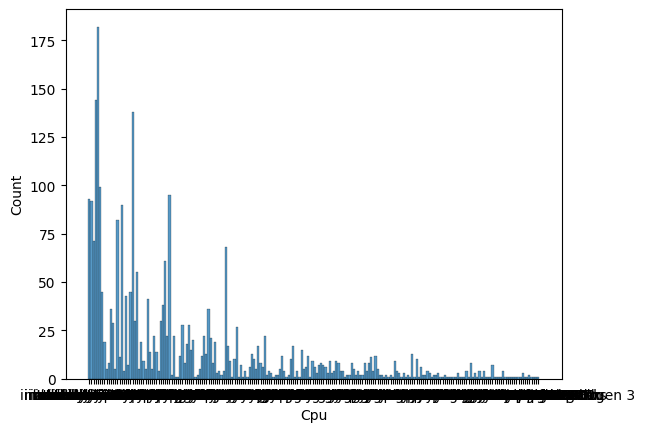

In [137]:
import seaborn as sns

sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

Cpu
intel core i7            895
intel core i5            832
Other intel processor    184
intel core i9            173
amd ryzen 5              158
amd ryzen 7              147
intel core i3            114
Mac Processor             99
amd ryzen 9               42
amd ryzen 3               37
Other amd processor       20
Name: count, dtype: int64

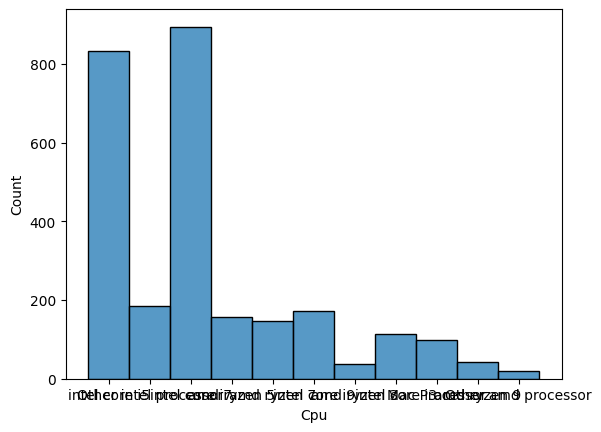

In [138]:
def cpu_type_define(text):
    text = text.split(' ')
    if text[0] == 'intel':
        if 'i' in text[-1]:
            return text[0]+' '+text[1]+' '+text[-1].split('-')[0] 
        
        return 'Other intel processor'
    elif text[0] == 'amd':
        if text[1] == 'ryzen':
            return text[0]+' '+text[1]+' '+text[2]
        
        return 'Other amd processor'
    elif 'm' in text[0]:
        return 'Mac Processor'
    else:
        return 'Other Processor'

data['Cpu'] = data['Cpu'].apply(cpu_type_define)
sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

Gpu
integrated graphics    1736
rtx 4070                167
rtx 4060                148
rtx 3050                122
rtx 3060                 68
rtx 4050                 58
rtx 4080                 47
rtx 3070                 43
rtx 4090                 35
rtx 3070ti               33
rtx 3050ti               26
rtx 3080                 21
gpu deca core            20
Amd low Gamma            17
rtx 3080ti               14
rtx 2050                 12
rtx a1000                 9
gpu octa core             9
rtx a3000                 8
rtx3060                   6
rtx 3050 ti               6
gpu hepta core            6
rtx 2070                  6
rtx3050                   5
rtx a2000                 5
gpu 18 n cleos            5
rtx3070                   5
rtx 2000                  5
rtx4070                   5
gpu 10 n cleos            5
rtx a500                  4
Amd High gamma            4
rtx 2080                  3
rtx a5500                 3
rtx 2060                  3
rtx4050         

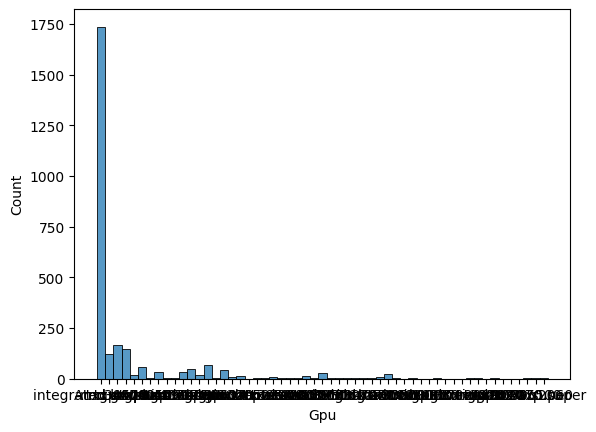

In [139]:
import re
def gpu_type_define(text):    
    
    if 'rtx' in text:
        num = ''.join([char for char in re.findall(r'\b\d+\b', text)])

        if num == 4080 or num == 4090 or num == 3080:
            return 'Nvidia High gamma'
        elif num == 4070 or num == 3070 or num == 4060 or num == 2080:
            return 'Nivida medium gamma'
        elif num == 3050 or num == 3060 or num == 4050 or num == 2070:
            return 'Nvidia low gamma'
        
    elif 'radeon' in text:
        if 'rx' in text:
            return 'Amd High gamma'
        else:
            return 'Amd low Gamma'
    
    return text
       
    

data['Gpu'] = data['Gpu'].apply(gpu_type_define)
sns.histplot(data=data,x='Gpu')
data['Gpu'].value_counts()